## Step 1: Import Libraries

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

## Step 2: Load the Dataset

In [3]:
data = pd.read_csv(r"C:\Users\IP G3\Downloads\Mall_Customers.csv")

In [5]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Step 3: Select Features

In [7]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

#### Here's the reason why we use .values: .values converts the selected Dataframe into a Numpy array
Example: If your dataframe look like:

Annual Income (k$)	Spending Score (1–100)
15	                    39
16	                    81

Then data[['Annual Income (k$)', 'Spending Score (1-100)']].values becomes

array([
[15,39],
[16,81]
])

and its important because some machine learning models needs data in the form of a Numpy array.

## Step 4: Visualize the Data

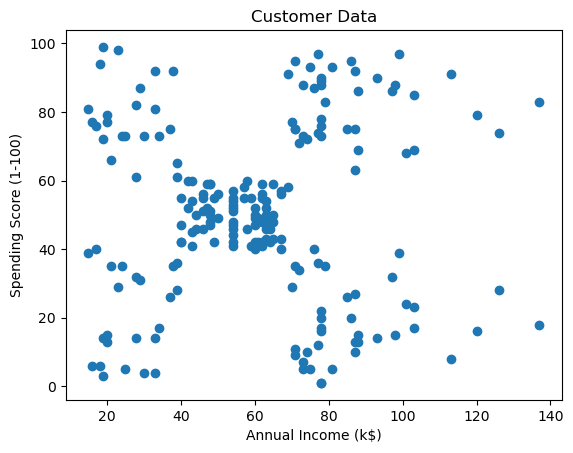

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data')
plt.show()

## Step 5: Scale the Data

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 6 : Plot K-Distance Graph to choose eps

In [26]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

#### Let's understand 'neighbors = NearestNeighbors(n_neighbors = 5)' this code in simple way with example:

Suppose there are 5 customers positioned like this:
A ─── B
│
C     D           E

A,B, and c are close together - they're neighbors
D is a bit farther but maybe still part of the same group
E is possibly an outlier

If we ask to the C that who are your 5 nearest neighbors; C might say "A,B,D but i have to reach far to find the 5th one - probably E"

Same thing happen in our graph: if points find their 5th neighbor close by, the curve stay flat

But when some points stretch far to find neighbors, the curve starts rising

Distances, Indices means the point's 5 nearest neighbors are at those distances and come from those positions in your dataset.

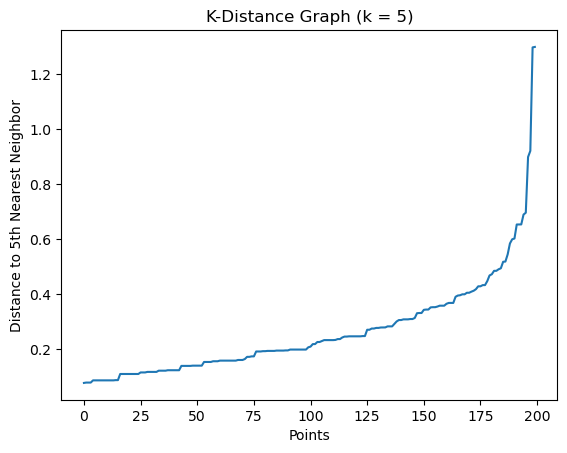

In [30]:
distances = np.sort(distances[:,4], axis = 0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('K-Distance Graph (k = 5)')
plt.show()

## Step 7 : Apply DBSCAN

In [58]:
db = DBSCAN(eps = 0.4, min_samples = 5)
labels = db.fit_predict(X_scaled)

## Step 8: Visualize Clusters

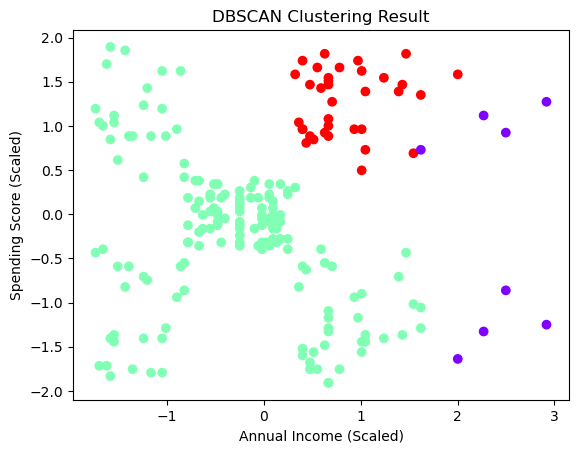

In [54]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = labels, cmap = 'rainbow')
plt.title('DBSCAN Clustering Result')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

## Step 9: Silhouette Score Exclude Noise

In [56]:
mask = labels!= -1
X_filtered = X_scaled[mask]
labels_filtered = labels[mask]

score = silhouette_score(X_filtered, labels_filtered)
print('Silhouette Score:', round(score, 3))

Silhouette Score: 0.388
